Initial distance: 15.961356757662166
Finished
Final distance: 7.91576234009419
Solution:


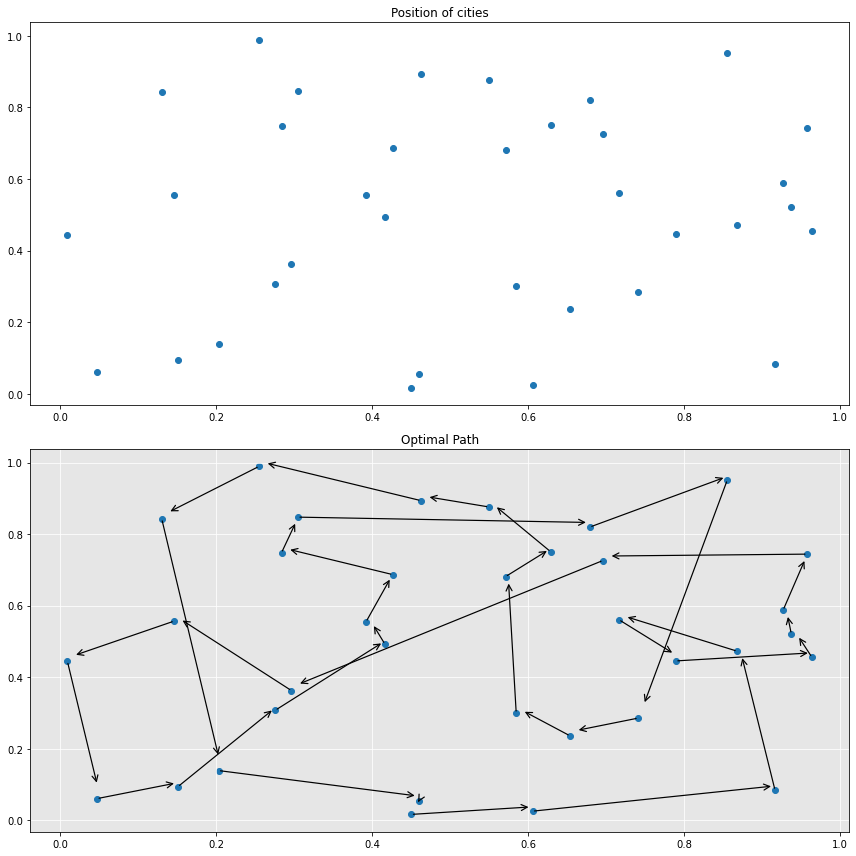

Time taken for  Genetic algorithm for 50 iterations: 1.7381696180000001


In [3]:
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt

class City:
    def __init__(self, x=None, y=None):
        self.x = None
        self.y = None
        if x is not None:
            self.x = x
        else:
            self.x = int(random.random() * 200)
        if y is not None:
            self.y = y
        else:
            self.y = int(random.random() * 200)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distanceTo(self, city):
        xDistance = abs(self.getX() - city.getX())
        yDistance = abs(self.getY() - city.getY())
        distance = math.sqrt((xDistance*xDistance) + (yDistance*yDistance))
        return distance

    def __repr__(self):
        return str(self.getX()) + ", " + str(self.getY())


class TourManager:
    destinationCities = []

    def addCity(self, city):
        self.destinationCities.append(city)

    def getCity(self, index):
        return self.destinationCities[index]

    def numberOfCities(self):
        return len(self.destinationCities)


class Tour:
    def __init__(self, tourmanager, tour=None):
        self.tourmanager = tourmanager
        self.tour = []
        self.fitness = 0.0
        self.distance = 0
        if tour is not None:
            self.tour = tour
        else:
            for i in range(0, self.tourmanager.numberOfCities()):
                self.tour.append(None)

    def __len__(self):
        return len(self.tour)

    def __getitem__(self, index):
        return self.tour[index]

    def __setitem__(self, key, value):
        self.tour[key] = value

    def __repr__(self):
        geneString = "|"
        for i in range(0, self.tourSize()):
            geneString += str(self.getCity(i)) + "|"
        return geneString

    def generateIndividual(self):
        for cityIndex in range(0, self.tourmanager.numberOfCities()):
            self.setCity(cityIndex, self.tourmanager.getCity(cityIndex))
        random.shuffle(self.tour)

    def getCity(self, tourPosition):
        return self.tour[tourPosition]

    def setCity(self, tourPosition, city):
        self.tour[tourPosition] = city
        self.fitness = 0.0
        self.distance = 0

    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.getDistance())
        return self.fitness

    def getDistance(self):
        if self.distance == 0:
            tourDistance = 0
            for cityIndex in range(0, self.tourSize()):
                fromCity = self.getCity(cityIndex)
                destinationCity = None
                if cityIndex+1 < self.tourSize():
                    destinationCity = self.getCity(cityIndex+1)
                else:
                    destinationCity = self.getCity(0)
                tourDistance += fromCity.distanceTo(destinationCity)
            self.distance = tourDistance
        return self.distance

    def tourSize(self):
        return len(self.tour)

    def containsCity(self, city):
        return city in self.tour


class Population:
    def __init__(self, tourmanager, populationSize, initialise):
        self.tours = []
        for i in range(0, populationSize):
            self.tours.append(None)

        if initialise:
            for i in range(0, populationSize):
                newTour = Tour(tourmanager)
                newTour.generateIndividual()
                self.saveTour(i, newTour)

    def __setitem__(self, key, value):
        self.tours[key] = value

    def __getitem__(self, index):
        return self.tours[index]

    def saveTour(self, index, tour):
        self.tours[index] = tour

    def getTour(self, index):
        return self.tours[index]

    def getFittest(self):
        fittest = self.tours[0]
        for i in range(0, self.populationSize()):
            if fittest.getFitness() <= self.getTour(i).getFitness():
                fittest = self.getTour(i)
        return fittest

    def populationSize(self):
        return len(self.tours)


class GA:
    def __init__(self, tourmanager):
        self.tourmanager = tourmanager
        self.mutationRate = 0.01
        self.tournamentSize = 5
        self.elitism = True

    def evolvePopulation(self, pop):
        newPopulation = Population(
            self.tourmanager, pop.populationSize(), False)
        elitismOffset = 0
        if self.elitism:
            newPopulation.saveTour(0, pop.getFittest())
            elitismOffset = 1

        for i in range(elitismOffset, newPopulation.populationSize()):
            parent1 = self.tournamentSelection(pop)
            parent2 = self.tournamentSelection(pop)
            child = self.crossover(parent1, parent2)
            newPopulation.saveTour(i, child)

        for i in range(elitismOffset, newPopulation.populationSize()):
            self.mutate(newPopulation.getTour(i))

        return newPopulation

    def crossover(self, parent1, parent2):
        child = Tour(self.tourmanager)

        startPos = int(random.random() * parent1.tourSize())
        endPos = int(random.random() * parent1.tourSize())

        for i in range(0, child.tourSize()):
            if startPos < endPos and i > startPos and i < endPos:
                child.setCity(i, parent1.getCity(i))
            elif startPos > endPos:
                if not (i < startPos and i > endPos):
                    child.setCity(i, parent1.getCity(i))

        for i in range(0, parent2.tourSize()):
            if not child.containsCity(parent2.getCity(i)):
                for ii in range(0, child.tourSize()):
                    if child.getCity(ii) == None:
                        child.setCity(ii, parent2.getCity(i))
                        break

        return child

    def mutate(self, tour):
        for tourPos1 in range(0, tour.tourSize()):
            if random.random() < self.mutationRate:
                tourPos2 = int(tour.tourSize() * random.random())

                city1 = tour.getCity(tourPos1)
                city2 = tour.getCity(tourPos2)

                tour.setCity(tourPos2, city1)
                tour.setCity(tourPos1, city2)

    def tournamentSelection(self, pop):
        tournament = Population(self.tourmanager, self.tournamentSize, False)
        for i in range(0, self.tournamentSize):
            randomId = int(random.random() * pop.populationSize())
            tournament.saveTour(i, pop.getTour(randomId))
        fittest = tournament.getFittest()
        return fittest


def genetic():
   
    tourmanager = TourManager()
    
    cities=35
    positions = np.random.rand(cities, 2)
    
    for i in positions:
        city=City(i[0],i[1])
        tourmanager.addCity(city)  
        
    #city = City(0, 0)
    #tourmanager.addCity(city)
    #city2 = City(3, 0)
    #tourmanager.addCity(city2)
    #city3 = City(6, 0)
    #tourmanager.addCity(city3)
    #city4 = City(0, 3)
    #tourmanager.addCity(city4)
    #city5 = City(3, 3)
    #tourmanager.addCity(city5)
    #city6 = City(6, 3)
    #tourmanager.addCity(city6)
    #city7 = City(0, 6)
    #tourmanager.addCity(city7)
    #city8 = City(3, 6)
    #tourmanager.addCity(city8)
    #city9 = City(6, 6)
    #tourmanager.addCity(city9)
    #city10 = City(5,7)
    #tourmanager.addCity(city10)
    # Initialize population
    pop = Population(tourmanager, 50, True)
    print("Initial distance: " + str(pop.getFittest().getDistance()))

    # Evolve population for 50 generations
    ga = GA(tourmanager)

    pop = ga.evolvePopulation(pop)
    for i in range(0, 100):
        # print(pop.getFittest().getDistance())
        pop = ga.evolvePopulation(pop)

    # Print final results
    print("Finished")
    print("Final distance: " + str(pop.getFittest().getDistance()))
    print("Solution:")
    solution=pop.getFittest()
    type(solution)
    start_node=0
    fig, ax = plt.subplots(2, figsize=(12,12))         # Prepare 2 plots
    ax[0].set_title('Position of cities')
    ax[1].set_title('Optimal Path')
    ax[0].scatter(positions[:, 0], positions[:, 1])             # plot A
    ax[1].scatter(positions[:, 0], positions[:, 1])# plot B
    plt.grid(color='w', linestyle='solid')
    ax[1].set_facecolor('#E6E6E6')
    distance = 0.0
    style = dict(size=15, color='red')
    for i in range(cities):
        start_pos = solution[i]
        if(i+1<cities):
            end_pos = solution[i+1]
        else:
            end_pos = solution[0]
        ax[1].annotate(" ",xy=(start_pos.getX(),start_pos.getY()), xycoords='data',xytext=(end_pos.getX(),end_pos.getY()), textcoords='data',arrowprops=dict(arrowstyle="<-",lw=1.2,connectionstyle="arc3"), **style)
    plt.tight_layout()
    plt.show()
        
    
    #print(pop.getFittest())
start = time.process_time()
genetic()
end = time.process_time()
print("Time taken for  Genetic algorithm for 50 iterations:",end - start)
